In [298]:
# Imports
import numpy as np 
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [299]:
# Each row is a training example, each column is a feature  [X1, X2, X3]
#X=np.array(([58,1.3],[34,1.3],[58,.3],[15,.1]), dtype=float)

#y=np.array(([166],[100],[100],[5]), dtype=float)

# assume features are soil moisture and soil grain size [58,1.3] = 58% soil moisture and 1.3mm grain size
# and training data is co2 flux [units aren't important for this example]
# First "training" set only has moist soils - smaller grain size makes it harder for roots to access water
X=np.array(([58,1.3],[34,1.3],[58,.3]), dtype=float)
y=np.array(([166],[100],[100]), dtype=float)

# Need to normalize data (transform the data between 0 and 1)
scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

def relu(X):
    return np.maximum(0,X)

def relu_prime(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self,learn_rate):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += learn_rate*d_weights1
        self.weights2 += learn_rate*d_weights2

    def train(self, X, y,learn_rate):
        self.output = self.feedforward()
        self.backprop(learn_rate)
        
    def test(self,new_input):
        self.layer1 = sigmoid(np.dot(new_input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(scaler_x.inverse_transform(X)))
        print ("Actual Output: \n" + str(scaler_y.inverse_transform(y)))
        print ("Predicted Output: \n" + str(scaler_y.inverse_transform(NN.feedforward())))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        
    NN.train(X, y,1)

for iteration # 0

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[153.55916516]
 [151.25335606]
 [153.05990141]]
Loss: 
0.4283007359249009


for iteration # 100

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[135.62614799]
 [119.69960457]
 [120.02734999]]
Loss: 
0.13098714827797606


for iteration # 200

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[152.65557485]
 [108.76336228]
 [110.12453458]]
Loss: 
0.027347444268640508


for iteration # 300

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[159.55148863]
 [104.04309558]
 [105.05843218]]
Loss: 
0.006391005268101767


for iteration # 400

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[161.40274452]
 [102.86566253]
 [103.6

In [300]:
# save predicted values
pred = scaler_y.inverse_transform(NN.feedforward())

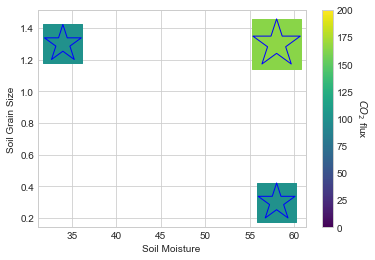

In [308]:
# Scatter Plot of features and predictions
X_orig = scaler_x.inverse_transform(X)
plt.scatter(X_orig[:,0], X_orig[:,1], alpha=1,
            s=15*pred, c=pred[:,0],  cmap='viridis',marker ='s')
plt.clim(0, 200)

actual = scaler_y.inverse_transform(y)
plt.scatter(X_orig[:,0], X_orig[:,1], alpha=1,
            s=15*actual, c=actual[:,0],  cmap='viridis',marker ='*',edgecolors='b')
plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar()  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);


In [302]:
# Testing out of sample "locations"

X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1],[80,.3]), dtype=float)
# Need to normalize data (transform the data between 0 and 1)
X_test= scaler_x.transform(X_test)
# Need to back transform results using original transformation settings
scaler_test = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_test.min_,scaler_test.scale_ = scaler_y.min_[0],scaler_y.scale_[0]
# Test model
pred_test = scaler_test.inverse_transform(NN.test(X_test))
print ("Predicted Output: \n" + str(pred_test))


Predicted Output: 
[[100.07649136]
 [165.39901307]
 [100.61916856]
 [100.00237563]
 [100.00657262]
 [101.28933745]]


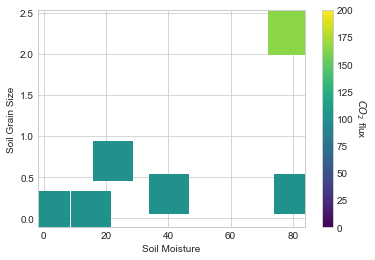

In [304]:
# Scatter Plot of features and predictions
X_all = scaler_x.inverse_transform(X_test)
pred_all = pred_test
plt.scatter(X_all[:,0], X_all[:,1], alpha=1,
            s=15*pred_all, c=pred_all[:,0],  cmap='viridis',marker ='s')
plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar();  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);


In [309]:
# In second "training" set we now have a very dry sample with very small soil grains 
# (think desert) which we see greatly reduced co2 flux and
# a really wet sample that also has low co2 flux

# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([58,1.3],[34,1.3],[58,.3],[15,.1],[87,.2]), dtype=float)
y=np.array(([166],[100],[100],[5],[12]), dtype=float)


# Need to normalize data (transform the data between 0 and 1)
scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(scaler_x.inverse_transform(X)))
        print ("Actual Output: \n" + str(scaler_y.inverse_transform(y)))
        print ("Predicted Output: \n" + str(scaler_y.inverse_transform(NN.feedforward())))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        
    NN.train(X, y,1)
    
    
X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1],[80,.3]), dtype=float)
X_test= scaler_x.transform(X_test)
scaler_test = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_test.min_,scaler_test.scale_ = scaler_y.min_[0],scaler_y.scale_[0]
scaler_test.inverse_transform(NN.test(X_test))


for iteration # 0

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]
 [87.   0.2]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]
 [ 12.]]
Predicted Output: 
[[138.22138384]
 [136.03928294]
 [134.1693677 ]
 [128.27098113]
 [136.58986611]]
Loss: 
0.26199912538788533


for iteration # 100

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]
 [87.   0.2]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]
 [ 12.]]
Predicted Output: 
[[135.96759785]
 [135.69884224]
 [ 52.41767202]
 [ 30.68385012]
 [ 44.40851871]]
Loss: 
0.047454980085016155


for iteration # 200

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]
 [87.   0.2]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]
 [ 12.]]
Predicted Output: 
[[139.5497826 ]
 [138.69867825]
 [ 52.11039845]
 [ 25.78540471]
 [ 44.40709953]]
Loss: 
0.046085172514346184


for iteration # 300

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]
 [87.   0.2]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]
 [ 12.]]
P

array([[ 99.80379256],
       [159.94287596],
       [106.23165983],
       [  8.24772934],
       [  6.17022249],
       [ 58.56660082]])

In [310]:
# save predicted values
pred_2 = scaler_y.inverse_transform(NN.feedforward())

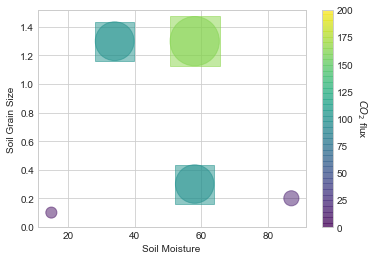

In [311]:
# Scatter Plot of features and predictions
X_orig_2 = scaler_x.inverse_transform(X)
plt.scatter(X_orig[:,0], X_orig[:,1], alpha=.5,
            s=15*pred, c=pred[:,0],  cmap='viridis',marker ='s')
plt.clim(0, 200)
plt.scatter(X_orig_2[:,0], X_orig_2[:,1], alpha=.5,
            s=15*pred_2, c=pred_2[:,0],  cmap='viridis',marker ='o')

plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar()  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);

In [312]:
# Testing out of sample "locations"
X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1],[80,.3]), dtype=float)

# Need to normalize data (transform the data between 0 and 1)
X_test= scaler_x.transform(X_test)
# Need to back transform results using original transformation settings
scaler_test = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_test.min_,scaler_test.scale_ = scaler_y.min_[0],scaler_y.scale_[0]
# Test model
pred_test_2 = scaler_test.inverse_transform(NN.test(X_test))

print ("Predicted Output: \n" + str(pred_test_2))

Predicted Output: 
[[ 99.80379256]
 [159.94287596]
 [106.23165983]
 [  8.24772934]
 [  6.17022249]
 [ 58.56660082]]


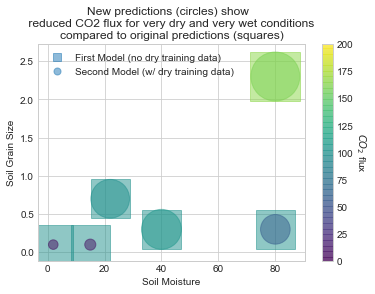

In [314]:
# Scatter Plot of features and predictions
X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1],[80,.3]), dtype=float)

X_all_2 = X_test
pred_all_2 = pred_test_2

fig, ax = plt.subplots() 
orig=plt.scatter(X_all[:,0], X_all[:,1], alpha=0.5,
            s=15*pred_all, c=pred_all[:,0],  cmap='viridis',marker ='s')
plt.clim(0, 200)
orig_2=plt.scatter(X_all_2[:,0], X_all_2[:,1], alpha=0.5,
            s=15*pred_all_2, c=pred_all_2[:,0],  cmap='viridis',marker ='o')
lgnd=plt.legend((orig,orig_2),('First Model (no dry training data)','Second Model (w/ dry training data)'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]

plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar();  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);
ax.set_title('New predictions (circles) show  \n reduced CO2 flux for very dry and very wet conditions \ncompared to original predictions (squares)')
plt.show() 
